In [1]:
model_id = "runwayml/stable-diffusion-v1-5"
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained('/store/CIA/js2164/repos/diffusion/stable-diffusion-v1-5')

/store/CIA/js2164/conda_envs/score_sde/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/store/CIA/js2164/conda_envs/score_sde/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [2]:
import torch
import random
from diffusers import DPMSolverMultistepScheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()
generator = torch.Generator("cuda").manual_seed(42)

In [3]:
def dummy_checker(images, **kwargs): return images, False
pipe.safety_checker = dummy_checker

In [4]:
def get_inputs(prompt, batch_size=1):
  #generator = [torch.Generator("cuda").manual_seed(random.randint(1,10000)) for i in range(batch_size)]
  generator = [torch.Generator("cuda").manual_seed(51+i) for i in range(batch_size)]
  prompts = batch_size * [prompt]
  num_inference_steps = 20

  return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}

In [7]:
from PIL import Image

def image_grid(imgs, rows=2, cols=2):
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [42]:
prompt = 'Robot Dachshund Professor wearing a blond wig and glasses pretending to be a human'
#prompt += " 50mm photography, hard rim lighting photography--beta --ar 2:3  --beta --upbeta"

images = pipe(**get_inputs(prompt,4)).images

100%|██████████| 20/20 [00:13<00:00,  1.47it/s]


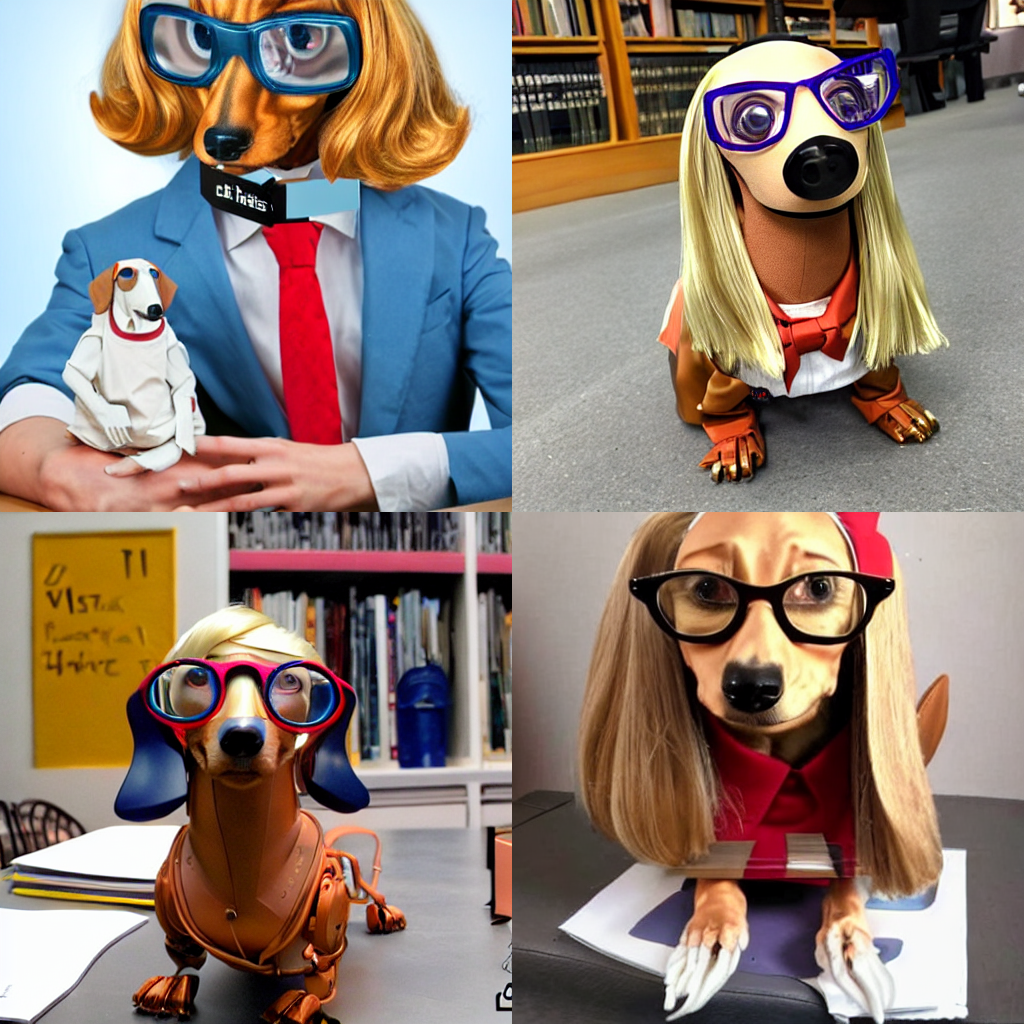

In [43]:
image_grid(images, rows=2, cols=2)